In [1]:
import pickle5 as pickle
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

# Train Feature Normalize

In [2]:
with open('intermediate_files/Train_bi_tri_wt.pkl', "rb") as fh:
    dft_bi_tri = pickle.load(fh)

In [3]:
with open('intermediate_files/Train_hyper_intj_puct_wt.pkl', "rb") as fh:
    dft_hyper_intj_puct = pickle.load(fh)

In [4]:
dft = pd.merge(dft_bi_tri,dft_hyper_intj_puct)

In [5]:
dft#.head()

,review,rating,label,bigram_set,bigram_wt,trigram_set,trigram_wt,bigram_posSet,bigram_posWt,trigram_posSet,trigram_posWt,hyper_set,hyper_wt,punc_set,punc_wt,intj_set,intj_wt
0,I simply had no idea how bad it is! I am a sta...,5.0,0,"[simply had, had no, no idea, idea how, how ba...",0.597990,"[simply had no, had no idea, no idea how, idea...",0.887160,"[nn rb, rb vbd, vbd dt, dt nn, nn wrb, wrb jj,...",0.530869,"[nn rb vbd, rb vbd dt, vbd dt nn, dt nn wrb, n...",0.534252,"[more corrupted, most liberal, how bad]",0.002737,"[., !, ', ""]",0.471721,"[blah, well]",0.040428
1,A searing indictment... This book is sure to b...,5.0,0,"[searing indictment, this book, book is, is su...",0.572722,"[this book is, book is sure, is sure to, sure ...",0.792049,"[dt vbg, vbg nn, nn dt, dt nn, nn vbz, vbz nn,...",0.530087,"[dt vbg nn, vbg nn dt, nn dt nn, dt nn vbz, nn...",0.535295,"[entirely new, most damning, how lucky, veheme...",0.002737,"[., ', "", !]",0.471721,[],0.000000
2,Another movie to ignore.... A perfect date mov...,1.0,1,"[another movie, movie to, to ignore, ignore pe...",0.483996,"[another movie to, movie to ignore, to ignore ...",0.914286,"[dt nn, nn to, to nn, nn dt, nn nn, nn rb, rb ...",0.470786,"[dt nn to, nn to nn, to nn dt, nn dt nn, dt nn...",0.476395,,0.000000,"[., ']",0.412439,[],0.000000
3,Buy this phone !! I got my Droid Incredible in...,5.0,0,"[buy this, this phone, got my, my droid, droid...",0.593645,"[buy this phone, got my droid, my droid incred...",0.881159,"[vb dt, dt nn, nn nn, nn vbd, vbd prp, prp nn,...",0.531483,"[vb dt nn, dt nn nn, nn nn vbd, nn vbd prp, vb...",0.537226,"[super fast, soon bottom]",0.001095,"[., !, ', ""]",0.471721,"[ha, like]",0.250892
4,Mother & daughter So far this is pretty boring...,3.0,0,"[mother daughter, daughter so, so far, far thi...",0.591287,"[mother daughter so, daughter so far, so far t...",0.911765,"[nn nn, nn rb, rb rb, rb dt, dt vbz, vbz rb, r...",0.535552,"[nn nn rb, nn rb rb, rb rb dt, rb dt vbz, dt v...",0.536632,[pretty boring],0.000547,"[?, ., ', ""]",0.452594,[ha],0.229489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Plays tracks in alphanumeric order This is a g...,1.0,0,"[plays tracks, tracks in, in alphanumeric, alp...",0.581565,"[plays tracks in, tracks in alphanumeric, in a...",0.738532,"[nns nns, nns in, in nn, nn nn, nn dt, dt vbz,...",0.531140,"[nns nns in, nns in nn, in nn nn, nn nn dt, nn...",0.534347,,0.000000,"[., ']",0.401862,"[sure, nx]",0.005945
648,be very CAREFUL!!!! This is good phone. It is ...,1.0,1,"[be very, very careful, this is, is good, good...",0.434718,"[be very careful, this is good, is good phone,...",0.815642,"[vb rb, rb nn, nn dt, dt vbz, vbz jj, jj nn, n...",0.468014,"[vb rb nn, rb nn dt, nn dt vbz, dt vbz jj, vbz...",0.465452,"[very careful, quite flimsy, very easy]",0.001642,"[., !]",0.342390,[],0.000000
649,Really like this movie and its sequeal 10.5 ap...,5.0,0,"[really like, like this, this movie, movie and...",0.582956,"[really like this, like this movie, this movie...",0.684783,"[rb in, in dt, dt nn, nn cc, cc prp, prp nn, n...",0.532343,"[rb in dt, in dt nn, dt nn cc, nn cc prp, cc p...",0.539769,,0.000000,"[., ']",0.401862,[],0.000000
650,Early Album of 2010 Candidate I open this revi...,5.0,0,"[early album, album of, of candidate, candidat...",0.610280,"[early album of, album of candidate, of candid...",0.856511,"[rb nn, nn in, in nn, nn nn, nn jj, jj dt, dt ...",0.531486,"[rb nn in, nn in nn, in nn nn, nn nn jj, nn jj...",0.536329,"[pretty good, seriously sick, more due, most s...",0.019704,"[., ', "", !]",0.471721,"[ha, please]",0.237812


In [6]:
def normalize(wt,f_set):
    n_wt =[]
    for sc,s in zip(wt,f_set):
        if sc==0:
            n_wt.append(0)
        else:
            n_wt.append(sc/len(s))
    
    return n_wt

In [7]:
def normalize_train(dft):
    
    dft['hyper_set'].replace(to_replace=[None], value='', inplace=True)
    dft['hyper_wt'].replace(to_replace=[None], value=0, inplace=True)
    
    dftF= dft.iloc[:,:3]

    dftF['bigram_wt'] = normalize(dft['bigram_wt'],dft['bigram_set'])
    dftF['trigram_wt'] = normalize(dft['trigram_wt'],dft['trigram_set'])
    dftF['bigram_posWt'] = normalize(dft['bigram_posWt'],dft['bigram_posSet'])
    dftF['trigram_posWt'] = normalize(dft['trigram_posWt'],dft['trigram_posSet'])
    dftF['intj_wt'] = normalize(dft['intj_wt'],dft['intj_set'])
    dftF['punc_wt'] = normalize(dft['punc_wt'],dft['punc_set'])
    dftF['hyper_wt'] = normalize(dft['hyper_wt'],dft['hyper_set'])

    for i in dft.columns:
        if 'set' in i.lower():
            dftF[i]=dft[i]
            
    mm=MinMaxScaler()

    for i in dftF.columns:
        if 'wt' in i.lower():
            dftF[i]=mm.fit_transform(dftF[[i]])
            
    dftF = dftF[dft.columns]
    
    return dftF

In [8]:
train_data = normalize_train(dft)

<AxesSubplot:>

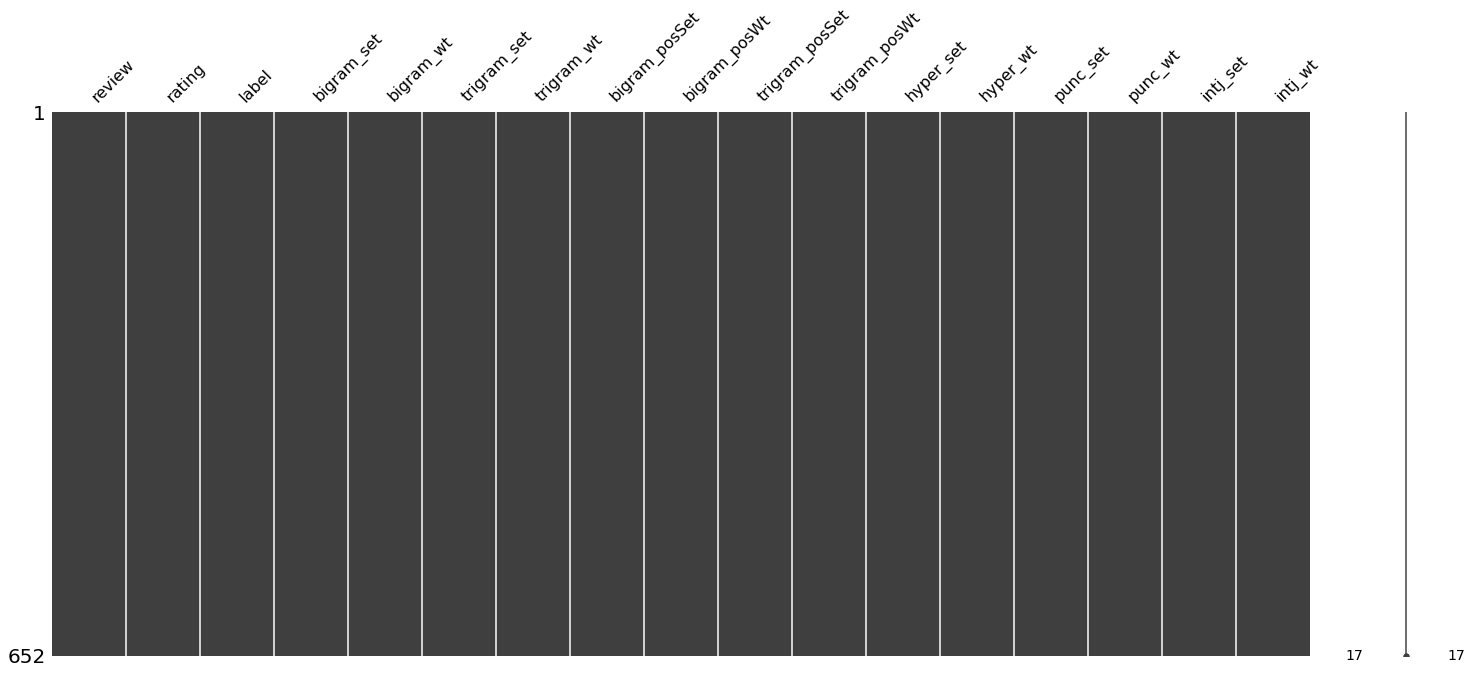

In [9]:
msno.matrix(train_data)

In [10]:
train_data.head()

,review,rating,label,bigram_set,bigram_wt,trigram_set,trigram_wt,bigram_posSet,bigram_posWt,trigram_posSet,trigram_posWt,hyper_set,hyper_wt,punc_set,punc_wt,intj_set,intj_wt
0,I simply had no idea how bad it is! I am a sta...,5.0,0,"[simply had, had no, no idea, idea how, how ba...",0.041707,"[simply had no, had no idea, no idea how, idea...",0.041026,"[nn rb, rb vbd, vbd dt, dt nn, nn wrb, wrb jj,...",0.061805,"[nn rb vbd, rb vbd dt, vbd dt nn, dt nn wrb, n...",0.052151,"[more corrupted, most liberal, how bad]",0.083333,"[., !, ', ""]",0.380544,"[blah, well]",0.088083
1,A searing indictment... This book is sure to b...,5.0,0,"[searing indictment, this book, book is, is su...",0.040193,"[this book is, book is sure, is sure to, sure ...",0.034986,"[dt vbg, vbg nn, nn dt, dt nn, nn vbz, vbz nn,...",0.065658,"[dt vbg nn, vbg nn dt, nn dt nn, dt nn vbz, nn...",0.060730,"[entirely new, most damning, how lucky, veheme...",0.062500,"[., ', "", !]",0.380544,[],0.000000
2,Another movie to ignore.... A perfect date mov...,1.0,1,"[another movie, movie to, to ignore, ignore pe...",0.311940,"[another movie to, movie to ignore, to ignore ...",0.379079,"[dt nn, nn to, to nn, nn dt, nn nn, nn rb, rb ...",0.474911,"[dt nn to, nn to nn, to nn dt, nn dt nn, dt nn...",0.466163,,0.000000,"[., ']",0.665440,[],0.000000
3,Buy this phone !! I got my Droid Incredible in...,5.0,0,"[buy this, this phone, got my, my droid, droid...",0.030222,"[buy this phone, got my droid, my droid incred...",0.028882,"[vb dt, dt nn, nn nn, nn vbd, vbd prp, prp nn,...",0.071422,"[vb dt nn, dt nn nn, nn nn vbd, nn vbd prp, vb...",0.046868,"[super fast, soon bottom]",0.050000,"[., !, ', ""]",0.380544,"[ha, like]",0.546632
4,Mother & daughter So far this is pretty boring...,3.0,0,"[mother daughter, daughter so, so far, far thi...",0.131978,"[mother daughter so, daughter so far, so far t...",0.139869,"[nn nn, nn rb, rb rb, rb dt, dt vbz, vbz rb, r...",0.167710,"[nn nn rb, nn rb rb, rb rb dt, rb dt vbz, dt v...",0.158374,[pretty boring],0.050000,"[?, ., ', ""]",0.365113,[ha],1.000000


In [11]:
train_data.to_pickle('intermediate_files/Final_train_feature.pkl')

# Test data 

In [12]:
## Test Data
with open('intermediate_files/Test_bi_tri.pkl', "rb") as fh:
    dftest_bi_tri = pickle.load(fh)
with open('intermediate_files/Test_hyper_intj_puct.pkl', "rb") as fh:
    dftest_hyper_intj_puct = pickle.load(fh)

In [13]:
test_data = pd.merge(dftest_bi_tri,dftest_hyper_intj_puct)

In [14]:
test_data

,review,rating,label,bigram_set,trigram_set,bigram_posSet,trigram_posSet,hyper_set,punc_set,intj_set
0,"Great Alyssa, but rather boring movie This is ...",2.0,0,"[great alyssa, alyssa but, but rather, rather ...","[great alyssa but, alyssa but rather, but rath...","[jj nn, nn cc, cc rb, rb nn, nn nn, nn dt, dt ...","[jj nn cc, nn cc rb, cc rb nn, rb nn nn, nn nn...","[very little, very sexy, really good]","[., ']",[]
1,worst ever If this was written by Danielle Ste...,1.0,1,"[worst ever, ever if, if this, this was, was w...","[worst ever if, ever if this, if this was, thi...","[jjs rb, rb in, in dt, dt vbd, vbd vbn, vbn in...","[jjs rb in, rb in dt, in dt vbd, dt vbd vbn, v...","[so bad, very least, how bad]","[., !, ']",[]
2,Hasselhoff Me! Please! One was having a parti...,5.0,1,"[hasselhoff me, one was, was having, having pa...","[one was having, was having particularly, havi...","[nn prp, prp nn, nn cd, cd vbd, vbd vbg, vbg d...","[nn prp nn, prp nn cd, nn cd vbd, cd vbd vbg, ...","[particularly good, quite refreshed, particula...","[', !, ?, ., ""]","[ha, please]"
3,"One Friday, Without the Milk He always brought...",3.0,1,"[one friday, friday without, without the, the ...","[one friday without, friday without the, witho...","[cd nn, nn in, in dt, dt nn, nn prp, prp rb, r...","[cd nn in, nn in dt, in dt nn, dt nn prp, nn p...",,"[?, ., ', ""]","[oz, wa, well]"
4,"this. sucked. bad. one word: punctuation. ok, ...",1.0,1,"[one word, word punctuation, ok folks, folks h...","[one word punctuation, ok folks heres, folks h...","[dt vbn, vbn jj, jj cd, cd nn, nn nn, nn nns, ...","[dt vbn jj, vbn jj cd, jj cd nn, cd nn nn, nn ...","[thuroughly impossible, mildly understandable]","[?, ., !]","[ok, oh, like]"
...,...,...,...,...,...,...,...,...,...,...
213,"If dragons could wear t-shirts, this is the on...",5.0,1,"[if dragons, dragons could, could wear, wear t...","[if dragons could, dragons could wear, could w...","[in nns, nns md, md nn, nn nns, nns dt, dt vbz...","[in nns md, nns md nn, md nn nns, nn nns dt, n...",[currently impossible],"[., ', ""]",[like]
214,Horrible Product this product only got one sta...,1.0,1,"[horrible product, product this, this product,...","[horrible product this, product this product, ...","[jj nn, nn dt, dt nn, nn rb, rb vbd, vbd cd, c...","[jj nn dt, nn dt nn, dt nn rb, nn rb vbd, rb v...",,"[., ', "", !]",[]
215,BDP-S560 vs Panasonic DMP-BD80 There seems to ...,5.0,0,"[bdps vs, vs panasonic, panasonic dmpbd, dmpbd...","[bdps vs panasonic, vs panasonic dmpbd, panaso...","[nn nn, nn rb, rb vbz, vbz to, to vb, vb dt, d...","[nn nn nn, nn nn rb, nn rb vbz, rb vbz to, vbz...","[extremely careful, very deep, too cheap, more...","[', !, ?, ., ""]","[right, ha, anyway]"
216,Great Gift... I know nothing about guitars so ...,4.0,0,"[great gift, know nothing, nothing about, abou...","[know nothing about, nothing about guitars, ab...","[jj nn, nn nn, nn vb, vb nn, nn in, in nns, nn...","[jj nn nn, nn nn vb, nn vb nn, vb nn in, nn in...",,"[., !]",[ha]


In [15]:
test_data.to_pickle('intermediate_files/Final_test_feature.pkl')